In [ ]:
# читаем библиотеку
import pandas as pd

# читаем csv-файл
covid_data = pd.read_csv('data/covid_data.csv', sep=',')

# читаем csv-файл
vaccinations_data = pd.read_csv('data/country_vaccinations.csv', sep=',')
# оставляем необходимые признаки
vaccinations_data = vaccinations_data[['country','date', 'total_vaccinations',\
    'people_vaccinated','people_vaccinated_per_hundred', \
    'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', \
    'daily_vaccinations', 'vaccines']]

# сгруппируем данные и просумирем некоторые признаки
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

# преобразуем признак date в формат datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# создадим новый признак, количество больных на данный момент
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] -\
    covid_data['recovered']
    
# находим разницу двух последовательно идущих строк во всей таблице
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily confirmed'] = covid_data.groupby(by='country')['confirmed']\
    .diff()
covid_data['daily deaths'] = covid_data.groupby(by='country')['deaths']\
    .diff()
covid_data['daily recovered'] = covid_data.groupby(by='country')['recovered']\
    .diff()
    
# предобработаем таблицу vaccination_data
# изменим тип данных
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

# создадим сводную таблицу, которая сгрупированна по двум признакам
covid_df = covid_data.merge(
    vaccinations_data,
    how='left',
    on=['date', 'country']
)

# создаем признак показывающий общий процент смертей и выздоровлений 
# среди зафиксированных случаев
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recovered_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

# Базовая визуализация в Pandas

## .plot()



        x — название признака, который будет отложен по оси абсцисс;
        y — название признака, который будет отложен по оси ординат;
        figsize — размер графика (кортеж из ширины и высоты в дюймах);
        kind —тип визуализации. Основные типы:
            'line' — линейный график (по умолчанию);
            'bar' — столбчатая диаграмма;
            'barh' — горизонтальная столбчатая диаграмма;
            'hist' — гистограмма;
            'box' — коробчатая диаграмма (boxplot);
            'pie' — круговая диаграмма;
            'scatter' — диаграмма рассеяния.

        grid — отображение сетки (по умолчанию False);
        legend — отображение легенды (по умолчанию False);
        title — название графика;
        color — цвет.



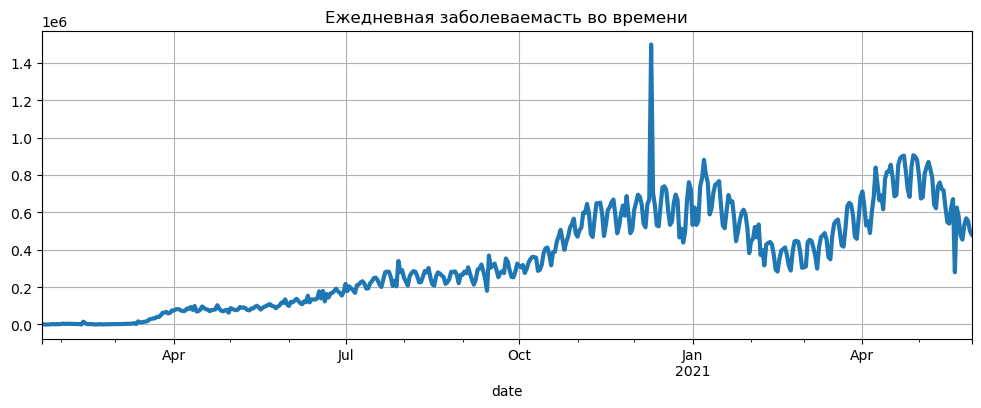

In [15]:
# создаем линейный график
# , который показывает зависимость дней 
# с общей суммой ежедневнгого числа заболевших
grouped_cases = covid_df.groupby('date')['daily confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемасть во времени',
    grid=True,
    lw=3
);

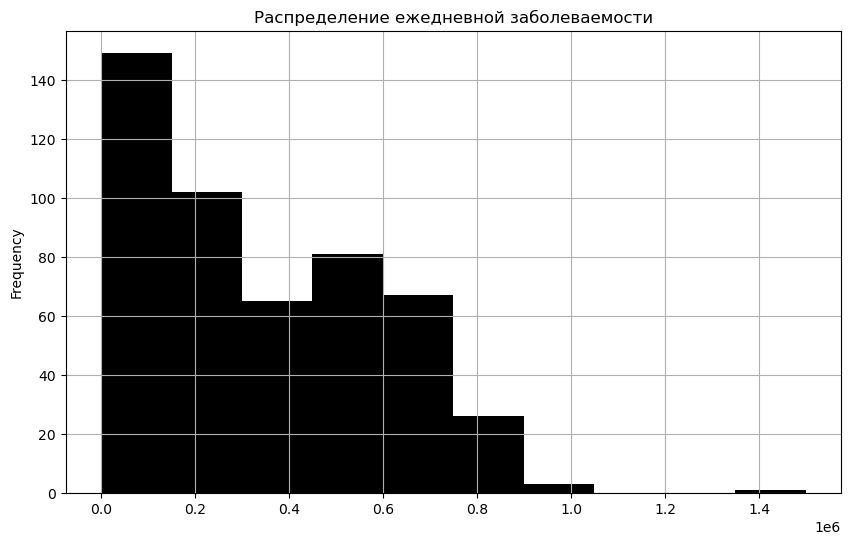

In [ ]:
# создаём гистограмму 
# смотрим на распределение количества прироста заболевших в день
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='black',
    bins=10,
);

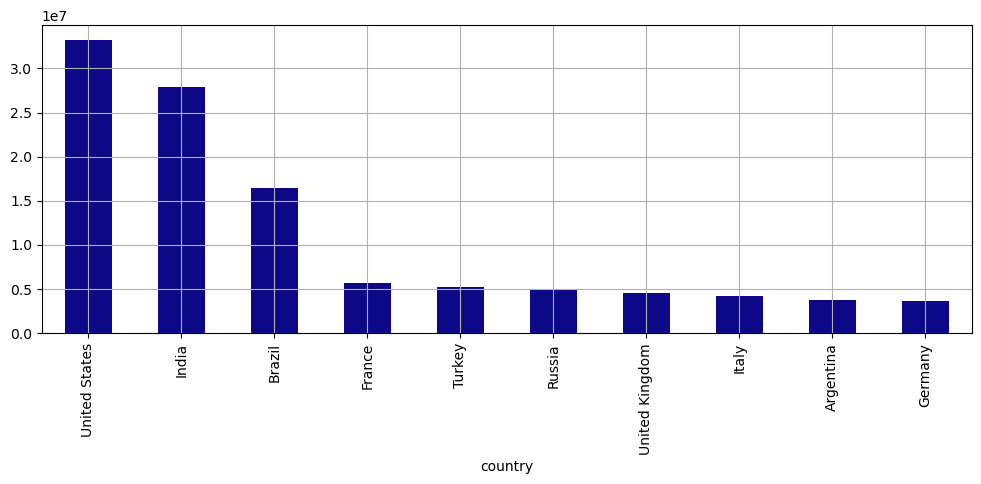

In [ ]:
# группирую по странам и нахожу последнее значение накопительного признака
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
# отбираю десять стран с самым максимальным значением 
grouped_country = grouped_country.nlargest(10)
# отображаю диаграмму
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

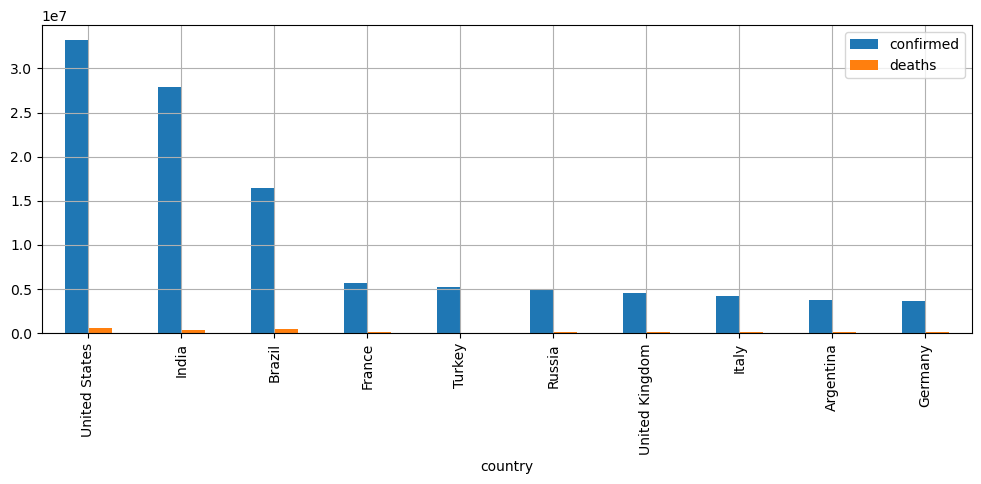

In [ ]:
# отображаю на графике сразу два признака 
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
# отбирю десять стран с наибольшим количестом зарегестрированных случаев
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
# отображаю диаграмму
grouped_country.plot(     
    kind='bar',   
    grid=True,     
    figsize=(12, 4),
);

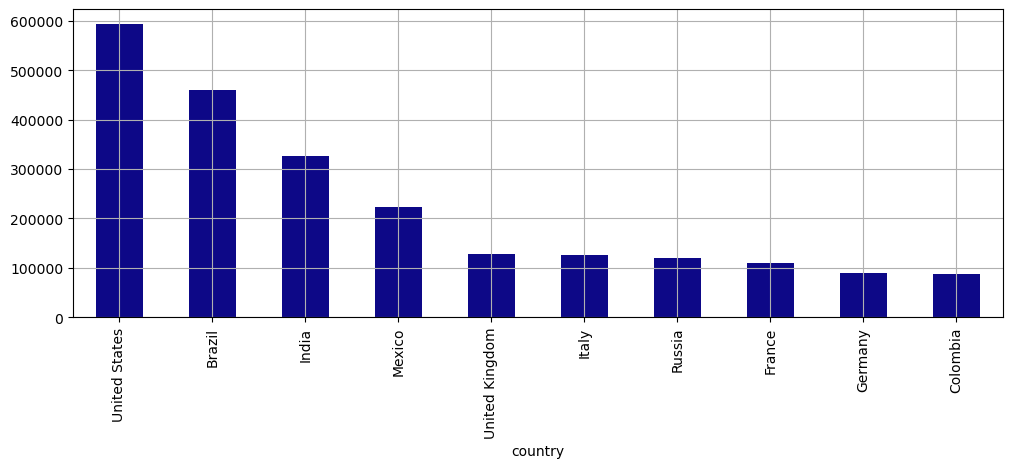

In [ ]:
# группирую по странам,
# в накопительном признке обираю значение, которое макчимальное
grouped_country = covid_df.groupby(['country'])['deaths'].last()
# отбирю десять стран с наибольшим количестом смертей
grouped_country = grouped_country.nlargest(10)
# рисую диграмму
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);